Import Titanic training set as data

In [99]:
%matplotlib inline
import sys
sys.path.append('../DataScience16/ThinkStats2')
import thinkstats2, thinkplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./train.csv')

Check for null data

In [93]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

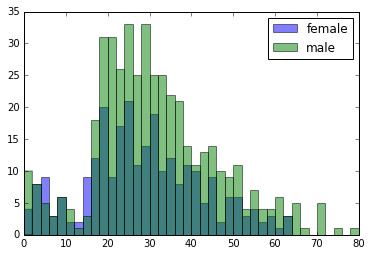

In [38]:
plt.hist(data.Age[data.Sex=='female'], bins=np.arange(0, 82, 2), alpha=.5)
plt.hist(data.Age[data.Sex=='male'], bins=np.arange(0, 82, 2), alpha=.5)
plt.legend(['female', 'male'])
plt.show()

Age distribution for men and women are fairly similar. If they were different, it could affect other investigations.

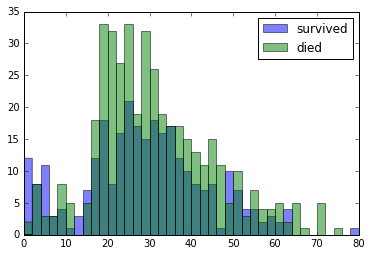

In [96]:
plt.hist(data[data.Survived==1].Age, bins=np.arange(0, 82, 2), alpha=.5)
plt.hist(data[data.Survived==0].Age, bins=np.arange(0, 82, 2), alpha=.5)
plt.hist(data[data.Survived==1].Age - data[data.Survived==0].Age, bins=np.arange(0, 82, 2))
plt.legend(['survived', 'died'])
plt.show()

Investigate basic survival rates among males/females, and adults/children.

In [73]:
female_surv, male_surv = data.groupby('Sex').Survived.mean()
print '% of males who survived:', male_surv*100
print '% of females who survived:', female_surv*100

% of males who survived: 18.8908145581
% of females who survived: 74.2038216561


In [95]:
over_16_surv, under_16_surv = data.groupby(data.Age<16).Survived.mean()
print '% of children under 16 who survived:', under_16_surv
print '% of adults 16 and older who survived:', over_16_surv

% of children under 16 who survived: 0.590361445783
% of adults 16 and older who survived: 0.362623762376


Investigate how the intersection of age and sex affect survival chances.

In [97]:
fem_adult, fem_child, male_adult, male_child = data.groupby(['Sex', data.Age<16]).mean().Survived

print 'A male child is', male_child/male_adult, 'more likely to surive the crash than a male adult.' 
print 'A female child, however, is only', fem_child/fem_adult, 'more likely to survive the crash than an adult female.'
print 'An adult female is', fem_adult/male_adult, 'more likely to survive the crash than an adult male.'

A male child is 3.20369318182 more likely to surive the crash than a male adult.
A female child, however, is only 0.860805445264 more likely to survive the crash than an adult female.
An adult female is 4.61611036565 more likely to survive the crash than an adult male.


Investigate whether males with families were more likely to survive.

In [172]:
# fem_fam, male_fam 
fam = data[(data.SibSp != 0) & (data.Parch != 0)]
lone = data[(data.SibSp == 1) & (data.Parch == 1)]
fem_fam = fam[fam.Sex=='female'].Survived
male_fam = fam[fam.Sex=='male'].Survived
fem_lone = lone[fam.Sex=='female'].Survived
male_lone = lone[fam.Sex=='male'].Survived

print 'Survival rate of males with / without families:', male_fam.mean(), '/', male_lone.mean()
print 'Survival rate of females with / without families:', fem_fam.mean(), '/', fem_lone.mean()

Survival rate of males with / without families: 0.285714285714 / 0.451612903226
Survival rate of females with / without families: 0.583333333333 / 0.769230769231


Passengers traveling without families tended to survive more than those travelling with them.